### K-Means

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') #Creación de imagenes con sólo vectores

In [2]:
census = pd.read_csv('./acs2015_county_data.csv')

In [3]:
census.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [4]:
census.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [5]:
census.isnull().sum(axis = 0)

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [6]:
census = census.dropna()

In [7]:
cols = [c for c in census.columns.values if c not in ['CensusId','State','County']]

In [8]:
from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=4)
census_clusters = kmeans.fit(census[cols])

In [10]:
len(census_clusters.cluster_centers_)

4

In [11]:
census_clusters.cluster_centers_

array([[4.91636213e+04, 2.43276000e+04, 2.48360213e+04, 1.05735632e+01,
        7.64456486e+01, 8.37155993e+00, 1.79891626e+00, 9.33431856e-01,
        6.59113300e-02, 3.63820558e+04, 4.52640923e+04, 2.96395468e+03,
        2.35384269e+04, 1.41439048e+03, 1.76698851e+01, 2.44180296e+01,
        3.05360263e+01, 1.83735304e+01, 2.20772085e+01, 1.29872250e+01,
        1.60262726e+01, 7.94217077e+01, 1.03420033e+01, 6.63908046e-01,
        3.34440066e+00, 1.59431856e+00, 4.63448276e+00, 2.30822660e+01,
        2.17587507e+04, 7.38585878e+01, 1.77766174e+01, 8.06781609e+00,
        2.96748768e-01, 8.08042693e+00],
       [2.59497053e+06, 1.27467168e+06, 1.32029884e+06, 3.28736842e+01,
        3.98684211e+01, 1.44368421e+01, 3.31578947e-01, 9.75789474e+00,
        1.89473684e-01, 1.65020984e+06, 5.85898947e+04, 4.97473684e+02,
        3.08353158e+04, 2.48105263e+02, 1.68368421e+01, 2.35842105e+01,
        3.71842105e+01, 1.95105263e+01, 2.45473684e+01, 8.02631579e+00,
        1.07368421e+01,

In [12]:
#¿A qué cluster pertenece cada dato?
preds = census_clusters.fit_predict(census[cols])
len(preds)

3218

La distancia real que hay entre el centroide del cluster y los datos

In [13]:
distancias = census_clusters.fit_transform(census[cols])
len(distancias)

3218

In [14]:
distancias

array([[9.80336060e+05, 1.15570684e+04, 3.69620918e+06, 1.43820788e+07],
       [7.69443598e+05, 2.21082536e+05, 3.48566101e+06, 1.41718751e+07],
       [1.02362680e+06, 3.61264875e+04, 3.73912400e+06, 1.44248665e+07],
       ...,
       [1.02818398e+06, 4.86627601e+04, 3.74315726e+06, 1.44287543e+07],
       [1.01180662e+06, 3.99542806e+04, 3.72670429e+06, 1.44123218e+07],
       [1.00709323e+06, 3.87173975e+04, 3.72196223e+06, 1.44075840e+07]])

In [15]:
#Se agrega una columna con el cluster al que corresponde
census['cluster'] = preds
census.cluster.unique()

array([0, 3, 1, 2], dtype=int64)

In [16]:
census[census.cluster==2]

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,cluster
204,6037,California,Los Angeles,10038388,4945351,5093037,48.2,26.9,8.0,0.2,...,2.3,5.1,30.0,4635465,79.0,11.5,9.4,0.2,10.0,2


In [17]:
census[census.cluster == 1].State.value_counts()

California    5
Texas         4
New York      3
Florida       2
Illinois      1
Arizona       1
Michigan      1
Washington    1
Nevada        1
Name: State, dtype: int64

In [18]:
census.groupby(['cluster']).Income.mean()

cluster
0    45264.092282
1    58589.894737
2    56196.000000
3    61615.901961
Name: Income, dtype: float64

In [19]:
census.groupby(['cluster'])['ChildPoverty'].mean()

cluster
0    24.418030
1    23.584211
2    25.800000
3    19.681046
Name: ChildPoverty, dtype: float64

In [20]:
census.cluster.value_counts()

0    3045
3     153
1      19
2       1
Name: cluster, dtype: int64

# Hierarchical Clustering

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [24]:
np.set_printoptions(precision=5, suppress=True) #Formato global para mostrar los datos: 5 decimales y sin redondeo

In [25]:
np.random.seed(4711)

In [26]:
#cov: Matriz nxn con n = al numero de elementos

a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,])

In [27]:
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size = [50,])

In [28]:
X = np.concatenate((a,b),)
X.shape

(150, 2)

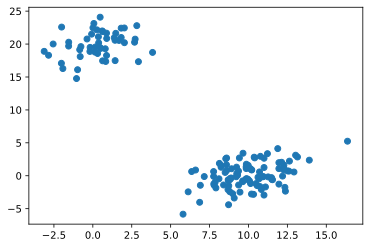

In [29]:
plt.scatter(X[:,0],X[:,1])
plt.show()

Documentación:
    
https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html

In [30]:
#Tipo de ligadura
Z = linkage(X,'ward')
Z.shape
# Z contiene todas las iteraciones que hizo el proceso

(149, 4)

In [31]:
#Primera iteracion
Z[0]

array([52.     , 53.     ,  0.04151,  2.     ])

In [32]:
#Forma de las iteraciones durante el procesamiento
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

In [33]:
Z[13]

array([ 62.    , 152.    ,   0.1726,   3.    ])

El elemento 62 se juntó con el cluster 3 (152), este cluster ahora tiene 3 observaciones

## Nota: 
   #### BigO: Medida de complejidad de algoritmos en python
   
   https://stackabuse.com/big-o-notation-and-algorithm-analysis-with-python-examples/

In [35]:
#Coordenadas de cada uno de los elementos que componen el cluster
X[[33,68,62]]

array([[ 9.83913, -0.4873 ],
       [ 9.89349, -0.44152],
       [ 9.97793, -0.56383]])

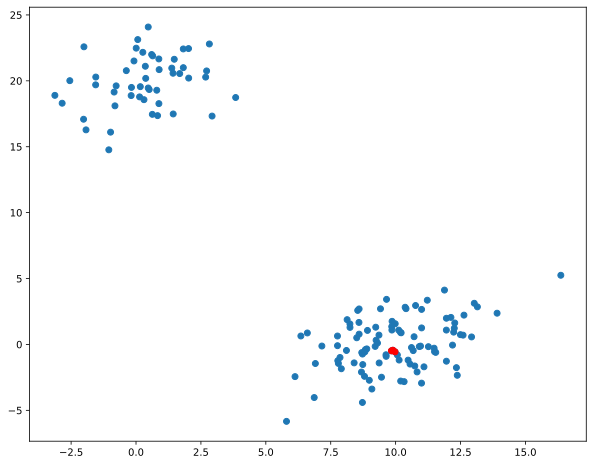

In [37]:
idxs = [33,68,62]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idxs,0], X[idxs,1],c='r')
plt.show()

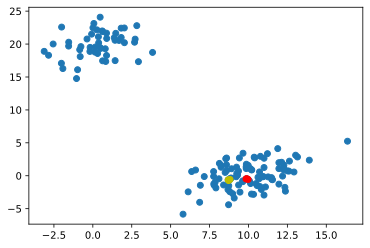

In [42]:
idxs = [15,69,41]
idxs1 = [33,68,62]
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[idxs,0],X[idxs,1],c='y')
plt.scatter(X[idxs1,0], X[idxs1,1],c='r')
plt.show()

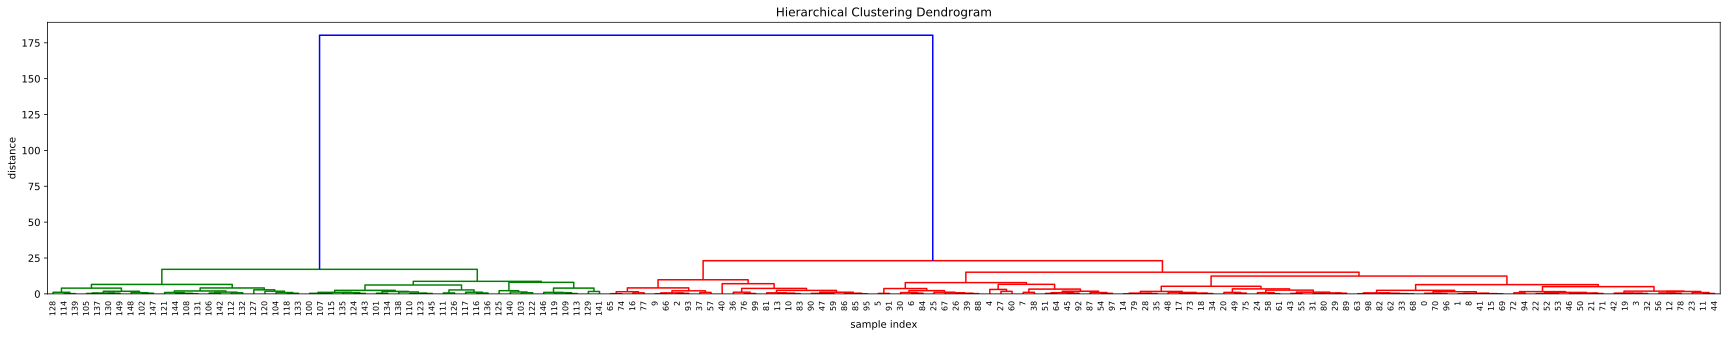

In [47]:
plt.figure(figsize=(30,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,leaf_rotation=90,leaf_font_size=8.)
plt.show()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [52.5, 52.5, 96.25, 96.25],
  [13.75, 13.75, 74.375, 74.375]],
 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0],
  [0.0, 8.74822274773959, 8.74822274773959, 8.049352823485103],
  [0.0, 17.11527361712349, 17.11527361712349, 8.74822274773959],
  [0.0, 7.11106083424195, 7.11106083424195, 0.0],
  [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195],
  [0.0, 6.65621608856717, 6.65621608856717, 0.0],
  [0.0, 7.868785423127421, 7.868785423127421, 6.65621608856717],
  [0.0, 12.427346572247922, 12.427346572247922, 0.0],
  [7.868785423127421,
   15.115331182663091,
   15.115331182663091,
   12.427346572247922],
  [9.844278294486319,
   23.12198935528675,
   23.12198935528675,
   15.115331182663091],
  [17.115273

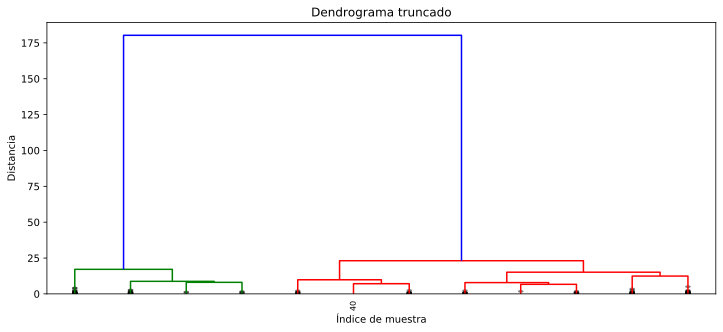

In [48]:
plt.figure(figsize=(12,5))
plt.title('Dendrograma truncado')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, truncate_mode='lastp',p=12,show_leaf_counts=False,leaf_rotation=90.,leaf_font_size=8.,show_contracted=True)

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 23.12198935528675, 23.12198935528675, 0.0],
  [0.0, 180.27043021047612, 180.27043021047612, 23.12198935528675]],
 'ivl': ['', '', ''],
 'leaves': [296, 293, 295],
 'color_list': ['g', 'b']}

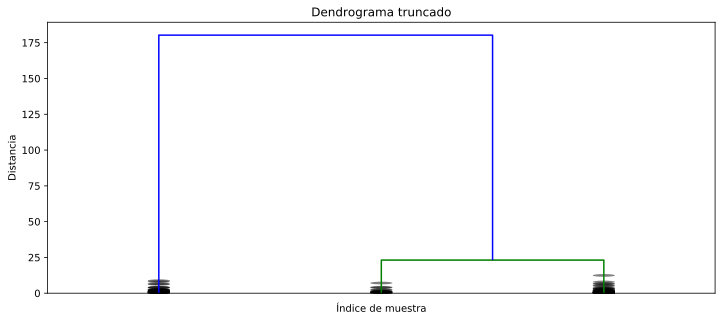

In [50]:
plt.figure(figsize=(12,5))
plt.title('Dendrograma truncado')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, truncate_mode='lastp',p=3,show_leaf_counts=False,leaf_rotation=90.,leaf_font_size=8.,show_contracted=True)

In [58]:
def fancy_dendro(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold']=max_d
    
    annotate_above = kwargs.pop('annotate_above', None)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Dendrogram')
        plt.xlabel('Sample index')
        plt.ylabel('Distance')
        
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5*sum(i[1:3])
            y = d[1]
            
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

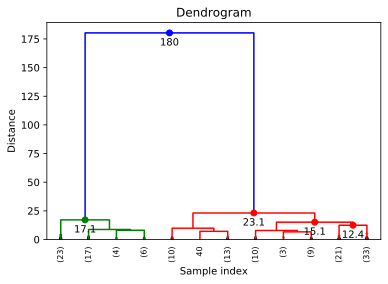

In [59]:
fancy_dendro(Z,truncate_mode='lastp',p=12,leaf_rotation=90.,leaf_font_size=8., show_contracted=True,annotate_above=10)
plt.show()

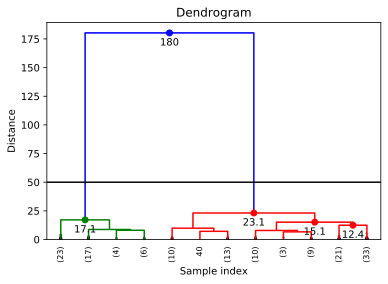

In [60]:
fancy_dendro(Z,truncate_mode='lastp',p=12,leaf_rotation=90.,leaf_font_size=8., show_contracted=True,annotate_above=10,max_d=50)
plt.show()